In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score


In [111]:
dataset=pd.read_csv('heart.csv')
dataset.head()
dataset.describe()
dataset.info()
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

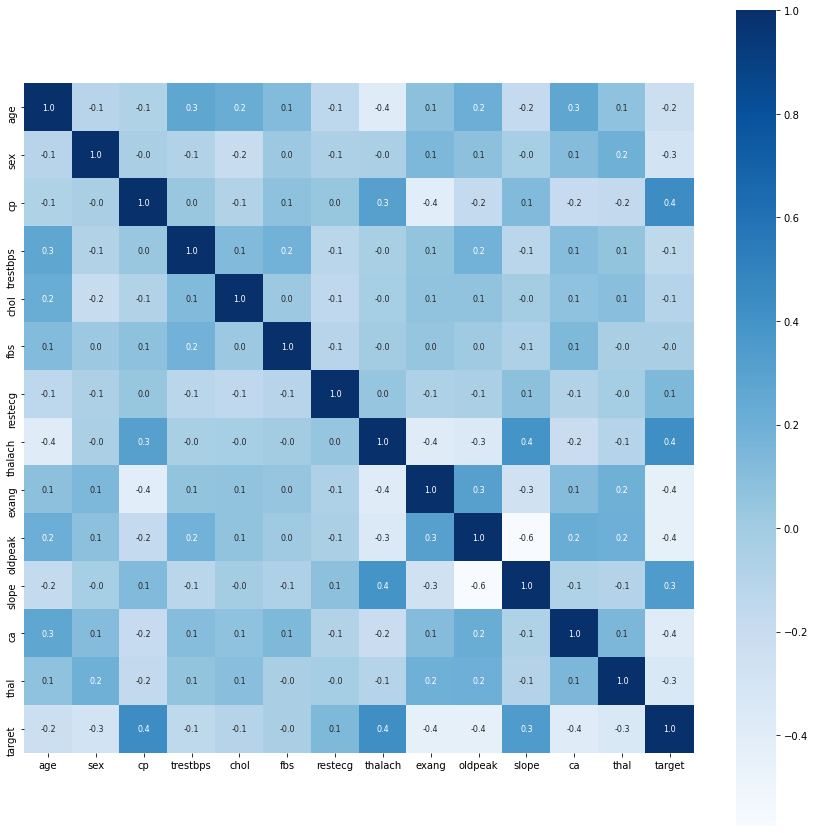

In [112]:
correlation = dataset.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

In [113]:
# feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()   
# print(dataset.iloc[:,3:4])
dataset[['age','trestbps','chol','thalach']]=st_x.fit_transform(dataset[['age','trestbps','chol','thalach']])
print(dataset)

           age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0    -0.268437    1   0 -0.377636 -0.659332    0        1  0.821321      0   
1    -0.158157    1   0  0.479107 -0.833861    1        0  0.255968      1   
2     1.716595    1   0  0.764688 -1.396233    0        1 -1.048692      1   
3     0.724079    1   0  0.936037 -0.833861    0        1  0.516900      0   
4     0.834359    0   0  0.364875  0.930822    1        1 -1.874977      0   
...        ...  ...  ..       ...       ...  ...      ...       ...    ...   
1020  0.503520    1   1  0.479107 -0.484803    0        1  0.647366      1   
1021  0.613800    1   0 -0.377636  0.232705    0        0 -0.352873      1   
1022 -0.819834    1   0 -1.234378  0.562371    0        0 -1.353113      1   
1023 -0.488996    0   0 -1.234378  0.155137    0        0  0.429923      0   
1024 -0.047877    1   0 -0.663216 -1.124743    0        1 -1.570556      0   

      oldpeak  slope  ca  thal  target  
0         1.0      2  

In [114]:
x=dataset.iloc[:,:-1]
print(x)
y=dataset.iloc[:,-1]
print(y)

           age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0    -0.268437    1   0 -0.377636 -0.659332    0        1  0.821321      0   
1    -0.158157    1   0  0.479107 -0.833861    1        0  0.255968      1   
2     1.716595    1   0  0.764688 -1.396233    0        1 -1.048692      1   
3     0.724079    1   0  0.936037 -0.833861    0        1  0.516900      0   
4     0.834359    0   0  0.364875  0.930822    1        1 -1.874977      0   
...        ...  ...  ..       ...       ...  ...      ...       ...    ...   
1020  0.503520    1   1  0.479107 -0.484803    0        1  0.647366      1   
1021  0.613800    1   0 -0.377636  0.232705    0        0 -0.352873      1   
1022 -0.819834    1   0 -1.234378  0.562371    0        0 -1.353113      1   
1023 -0.488996    0   0 -1.234378  0.155137    0        0  0.429923      0   
1024 -0.047877    1   0 -0.663216 -1.124743    0        1 -1.570556      0   

      oldpeak  slope  ca  thal  
0         1.0      2   2     3

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=2)

In [116]:
print(x_train.shape)
print(x_test.shape)

(871, 13)
(154, 13)


In [117]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
regressor.fit(x_train,y_train)

LogisticRegression()

In [118]:
#  finding the accuracy of training dataa
x_pred=regressor.predict(x_train)
cm=confusion_matrix(y_train,x_pred)
print(cm)
print(accuracy_score(y_train,x_pred))


# finding the accuracy of test data
y_pred=regressor.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[339  83]
 [ 40 409]]
0.8587830080367393
[[58 19]
 [ 7 70]]
0.8311688311688312


In [119]:
#  now using k-NN classifier algorithm
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=100)  
classifier.fit(x_train, y_train)  



#  finding the accuracy of training dataa
x_pred=regressor.predict(x_train)
cm=confusion_matrix(y_train,x_pred)
print(cm)
print(accuracy_score(y_train,x_pred))


# finding the accuracy of test data
y_pred=regressor.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[339  83]
 [ 40 409]]
0.8587830080367393
[[58 19]
 [ 7 70]]
0.8311688311688312


In [120]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  



#  finding the accuracy of training dataa
x_pred=regressor.predict(x_train)
cm=confusion_matrix(y_train,x_pred)
print(cm)
print(accuracy_score(y_train,x_pred))


# finding the accuracy of test data
y_pred=regressor.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[339  83]
 [ 40 409]]
0.8587830080367393
[[58 19]
 [ 7 70]]
0.8311688311688312


In [121]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train) 



#  finding the accuracy of training dataa
x_pred=regressor.predict(x_train)
cm=confusion_matrix(y_train,x_pred)
print(cm)
print(accuracy_score(y_train,x_pred))


# finding the accuracy of test data
y_pred=regressor.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[339  83]
 [ 40 409]]
0.8587830080367393
[[58 19]
 [ 7 70]]
0.8311688311688312


In [122]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  




#  finding the accuracy of training dataa
x_pred=regressor.predict(x_train)
cm=confusion_matrix(y_train,x_pred)
print(cm)
print(accuracy_score(y_train,x_pred))


# finding the accuracy of test data
y_pred=regressor.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[339  83]
 [ 40 409]]
0.8587830080367393
[[58 19]
 [ 7 70]]
0.8311688311688312
